# VGGNet

## 1. Environment Setup

### 1.0. Check GPU

In [1]:
!nvidia-smi

Fri May 15 14:38:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN Xp            Off  | 00000000:17:00.0 Off |                  N/A |
|  0%   22C    P5    12W / 250W |      2MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:65:00.0 Off |                  N/A |
|  0%   29C    P8     8W / 250W |      2MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### 1.1. Install Pytorch and torchvision

In [2]:
# Install pytorch and torchvision
!pip install torch torchvision

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.2. Install matplotlib

In [3]:
!pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.3. Import

In [4]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

## 2. Data Preprocessing

In [5]:
batch_size = 256

In [6]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10('./data/', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True)

testset = torchvision.datasets.CIFAR10('./data/', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


## 3. Train Model

In [7]:
depth = 16
batch_norm = True
num_classes = 10
pretrained = False

gpu_id = 0
print_freq = 10


start_epoch = 0
epochs = 400

lr = 0.01
momentum = 0.9
weight_decay = 0.0005

# path to checkpoint
resume = False

In [8]:
vgg = train.VGGNet(depth, batch_norm, num_classes, pretrained, gpu_id, print_freq)

=> Create model with depth : 16, batch_norm : True


In [9]:
vgg.train(trainloader, testloader, resume=False, 
          start_epoch=start_epoch, epochs=epochs, 
          lr=lr, momentum=momentum, weight_decay=weight_decay)

Epoch 1 Started...
Iteration : 10 - Train Loss : 2.30, Test Loss : 2.30, Train Acc : 15.62, Test Acc : 16.14
Iteration : 20 - Train Loss : 2.25, Test Loss : 2.25, Train Acc : 13.67, Test Acc : 13.72
Iteration : 30 - Train Loss : 2.19, Test Loss : 2.15, Train Acc : 15.23, Test Acc : 17.51
Iteration : 40 - Train Loss : 2.00, Test Loss : 2.09, Train Acc : 21.09, Test Acc : 19.96
Iteration : 50 - Train Loss : 2.03, Test Loss : 1.96, Train Acc : 23.83, Test Acc : 23.59
Iteration : 60 - Train Loss : 1.99, Test Loss : 1.89, Train Acc : 23.83, Test Acc : 25.72
Iteration : 70 - Train Loss : 1.97, Test Loss : 1.95, Train Acc : 27.34, Test Acc : 25.48
Iteration : 80 - Train Loss : 1.94, Test Loss : 2.01, Train Acc : 26.17, Test Acc : 21.86
Iteration : 90 - Train Loss : 1.88, Test Loss : 1.79, Train Acc : 28.52, Test Acc : 33.10
Iteration : 100 - Train Loss : 1.94, Test Loss : 1.81, Train Acc : 26.17, Test Acc : 30.66
Iteration : 110 - Train Loss : 1.94, Test Loss : 1.84, Train Acc : 28.91, Test A

Iteration : 150 - Train Loss : 1.50, Test Loss : 1.26, Train Acc : 43.36, Test Acc : 52.85
Iteration : 160 - Train Loss : 1.30, Test Loss : 1.26, Train Acc : 52.34, Test Acc : 54.70
Iteration : 170 - Train Loss : 1.43, Test Loss : 1.21, Train Acc : 50.78, Test Acc : 55.53
Iteration : 180 - Train Loss : 1.34, Test Loss : 1.26, Train Acc : 48.83, Test Acc : 54.59
Iteration : 190 - Train Loss : 1.38, Test Loss : 1.23, Train Acc : 52.73, Test Acc : 56.27
Epoch 6 Started...
Iteration : 10 - Train Loss : 1.42, Test Loss : 1.25, Train Acc : 48.44, Test Acc : 55.35
Iteration : 20 - Train Loss : 1.48, Test Loss : 1.23, Train Acc : 43.36, Test Acc : 54.80
Iteration : 30 - Train Loss : 1.28, Test Loss : 1.17, Train Acc : 55.47, Test Acc : 57.73
Iteration : 40 - Train Loss : 1.38, Test Loss : 1.34, Train Acc : 50.39, Test Acc : 52.68
Iteration : 50 - Train Loss : 1.50, Test Loss : 1.28, Train Acc : 47.66, Test Acc : 53.00
Iteration : 60 - Train Loss : 1.26, Test Loss : 1.16, Train Acc : 56.64, Tes

Iteration : 100 - Train Loss : 1.07, Test Loss : 0.97, Train Acc : 60.16, Test Acc : 65.49
Iteration : 110 - Train Loss : 1.08, Test Loss : 0.95, Train Acc : 59.77, Test Acc : 67.39
Iteration : 120 - Train Loss : 1.14, Test Loss : 0.89, Train Acc : 61.72, Test Acc : 67.76
Iteration : 130 - Train Loss : 1.20, Test Loss : 0.88, Train Acc : 54.30, Test Acc : 69.33
Iteration : 140 - Train Loss : 1.12, Test Loss : 0.86, Train Acc : 58.59, Test Acc : 68.70
Iteration : 150 - Train Loss : 1.22, Test Loss : 0.90, Train Acc : 57.81, Test Acc : 68.73
Iteration : 160 - Train Loss : 1.21, Test Loss : 0.88, Train Acc : 56.25, Test Acc : 69.06
Iteration : 170 - Train Loss : 1.16, Test Loss : 0.92, Train Acc : 65.23, Test Acc : 67.36
Iteration : 180 - Train Loss : 1.30, Test Loss : 0.89, Train Acc : 53.91, Test Acc : 68.28
Iteration : 190 - Train Loss : 1.08, Test Loss : 0.91, Train Acc : 57.42, Test Acc : 68.49
Epoch 11 Started...
Iteration : 10 - Train Loss : 1.34, Test Loss : 0.90, Train Acc : 52.3

Iteration : 50 - Train Loss : 1.16, Test Loss : 0.72, Train Acc : 60.16, Test Acc : 74.99
Iteration : 60 - Train Loss : 0.82, Test Loss : 0.79, Train Acc : 72.27, Test Acc : 72.19
Iteration : 70 - Train Loss : 1.04, Test Loss : 0.77, Train Acc : 63.67, Test Acc : 73.54
Iteration : 80 - Train Loss : 1.04, Test Loss : 0.75, Train Acc : 62.50, Test Acc : 74.12
Iteration : 90 - Train Loss : 1.02, Test Loss : 0.75, Train Acc : 63.67, Test Acc : 74.09
Iteration : 100 - Train Loss : 1.05, Test Loss : 0.72, Train Acc : 62.89, Test Acc : 75.32
Iteration : 110 - Train Loss : 0.93, Test Loss : 0.79, Train Acc : 66.80, Test Acc : 72.81
Iteration : 120 - Train Loss : 1.06, Test Loss : 0.79, Train Acc : 60.94, Test Acc : 72.61
Iteration : 130 - Train Loss : 1.13, Test Loss : 0.78, Train Acc : 62.89, Test Acc : 72.98
Iteration : 140 - Train Loss : 0.91, Test Loss : 0.79, Train Acc : 69.53, Test Acc : 72.43
Iteration : 150 - Train Loss : 1.00, Test Loss : 0.73, Train Acc : 64.84, Test Acc : 74.76
Iter

Iteration : 190 - Train Loss : 0.84, Test Loss : 0.67, Train Acc : 71.88, Test Acc : 76.68
Epoch 20 Started...
Iteration : 10 - Train Loss : 0.84, Test Loss : 0.72, Train Acc : 68.75, Test Acc : 74.98
Iteration : 20 - Train Loss : 0.98, Test Loss : 0.76, Train Acc : 67.97, Test Acc : 74.93
Iteration : 30 - Train Loss : 0.82, Test Loss : 0.69, Train Acc : 69.92, Test Acc : 76.76
Iteration : 40 - Train Loss : 0.90, Test Loss : 0.69, Train Acc : 66.80, Test Acc : 76.41
Iteration : 50 - Train Loss : 0.95, Test Loss : 0.65, Train Acc : 69.14, Test Acc : 78.17
Iteration : 60 - Train Loss : 0.72, Test Loss : 0.73, Train Acc : 75.39, Test Acc : 75.16
Iteration : 70 - Train Loss : 0.94, Test Loss : 0.66, Train Acc : 68.75, Test Acc : 77.29
Iteration : 80 - Train Loss : 0.81, Test Loss : 0.65, Train Acc : 71.88, Test Acc : 78.32
Iteration : 90 - Train Loss : 0.99, Test Loss : 0.67, Train Acc : 64.84, Test Acc : 76.82
Iteration : 100 - Train Loss : 0.88, Test Loss : 0.68, Train Acc : 68.36, Test 

Iteration : 140 - Train Loss : 0.79, Test Loss : 0.69, Train Acc : 73.83, Test Acc : 76.67
Iteration : 150 - Train Loss : 0.71, Test Loss : 0.59, Train Acc : 75.78, Test Acc : 79.50
Iteration : 160 - Train Loss : 0.90, Test Loss : 0.64, Train Acc : 70.31, Test Acc : 78.42
Iteration : 170 - Train Loss : 0.78, Test Loss : 0.61, Train Acc : 70.70, Test Acc : 78.80
Iteration : 180 - Train Loss : 0.78, Test Loss : 0.62, Train Acc : 73.05, Test Acc : 78.37
Iteration : 190 - Train Loss : 0.86, Test Loss : 0.66, Train Acc : 66.41, Test Acc : 77.19
Epoch 25 Started...
Iteration : 10 - Train Loss : 1.00, Test Loss : 0.59, Train Acc : 68.36, Test Acc : 80.02
Iteration : 20 - Train Loss : 0.87, Test Loss : 0.62, Train Acc : 68.75, Test Acc : 79.05
Iteration : 30 - Train Loss : 0.75, Test Loss : 0.60, Train Acc : 76.17, Test Acc : 79.43
Iteration : 40 - Train Loss : 0.82, Test Loss : 0.67, Train Acc : 69.14, Test Acc : 77.57
Iteration : 50 - Train Loss : 0.81, Test Loss : 0.61, Train Acc : 71.48, T

Iteration : 90 - Train Loss : 0.76, Test Loss : 0.57, Train Acc : 74.22, Test Acc : 80.87
Iteration : 100 - Train Loss : 0.76, Test Loss : 0.57, Train Acc : 71.88, Test Acc : 80.76
Iteration : 110 - Train Loss : 0.83, Test Loss : 0.54, Train Acc : 70.31, Test Acc : 81.28
Iteration : 120 - Train Loss : 0.81, Test Loss : 0.54, Train Acc : 73.05, Test Acc : 81.62
Iteration : 130 - Train Loss : 0.61, Test Loss : 0.57, Train Acc : 79.30, Test Acc : 80.34
Iteration : 140 - Train Loss : 0.71, Test Loss : 0.56, Train Acc : 73.44, Test Acc : 81.33
Iteration : 150 - Train Loss : 0.76, Test Loss : 0.56, Train Acc : 75.00, Test Acc : 80.68
Iteration : 160 - Train Loss : 0.71, Test Loss : 0.53, Train Acc : 75.00, Test Acc : 81.45
Iteration : 170 - Train Loss : 0.75, Test Loss : 0.58, Train Acc : 73.83, Test Acc : 80.51
Iteration : 180 - Train Loss : 0.83, Test Loss : 0.56, Train Acc : 71.09, Test Acc : 80.94
Iteration : 190 - Train Loss : 0.73, Test Loss : 0.56, Train Acc : 77.73, Test Acc : 80.58


Iteration : 40 - Train Loss : 0.66, Test Loss : 0.59, Train Acc : 76.56, Test Acc : 81.06
Iteration : 50 - Train Loss : 0.64, Test Loss : 0.57, Train Acc : 74.61, Test Acc : 80.89
Iteration : 60 - Train Loss : 0.59, Test Loss : 0.57, Train Acc : 79.69, Test Acc : 81.25
Iteration : 70 - Train Loss : 0.72, Test Loss : 0.54, Train Acc : 75.00, Test Acc : 81.99
Iteration : 80 - Train Loss : 0.80, Test Loss : 0.53, Train Acc : 73.44, Test Acc : 82.05
Iteration : 90 - Train Loss : 0.78, Test Loss : 0.54, Train Acc : 74.22, Test Acc : 82.01
Iteration : 100 - Train Loss : 0.74, Test Loss : 0.50, Train Acc : 75.78, Test Acc : 82.74
Iteration : 110 - Train Loss : 0.67, Test Loss : 0.53, Train Acc : 72.66, Test Acc : 82.27
Iteration : 120 - Train Loss : 0.83, Test Loss : 0.51, Train Acc : 69.53, Test Acc : 82.57
Iteration : 130 - Train Loss : 0.71, Test Loss : 0.53, Train Acc : 77.34, Test Acc : 82.88
Iteration : 140 - Train Loss : 0.73, Test Loss : 0.56, Train Acc : 73.83, Test Acc : 81.04
Itera

Iteration : 180 - Train Loss : 0.67, Test Loss : 0.57, Train Acc : 75.39, Test Acc : 81.05
Iteration : 190 - Train Loss : 0.67, Test Loss : 0.51, Train Acc : 78.52, Test Acc : 82.67
Epoch 39 Started...
Iteration : 10 - Train Loss : 0.64, Test Loss : 0.50, Train Acc : 77.34, Test Acc : 83.19
Iteration : 20 - Train Loss : 0.70, Test Loss : 0.52, Train Acc : 76.17, Test Acc : 82.87
Iteration : 30 - Train Loss : 0.67, Test Loss : 0.50, Train Acc : 76.17, Test Acc : 83.22
Iteration : 40 - Train Loss : 0.71, Test Loss : 0.52, Train Acc : 78.91, Test Acc : 82.47
Iteration : 50 - Train Loss : 0.65, Test Loss : 0.52, Train Acc : 75.00, Test Acc : 82.46
Iteration : 60 - Train Loss : 0.68, Test Loss : 0.53, Train Acc : 75.00, Test Acc : 82.74
Iteration : 70 - Train Loss : 0.63, Test Loss : 0.52, Train Acc : 78.52, Test Acc : 82.94
Iteration : 80 - Train Loss : 0.62, Test Loss : 0.55, Train Acc : 77.34, Test Acc : 81.67
Iteration : 90 - Train Loss : 0.73, Test Loss : 0.54, Train Acc : 74.61, Test 

Iteration : 130 - Train Loss : 0.65, Test Loss : 0.47, Train Acc : 78.12, Test Acc : 84.14
Iteration : 140 - Train Loss : 0.66, Test Loss : 0.48, Train Acc : 75.78, Test Acc : 84.51
Iteration : 150 - Train Loss : 0.62, Test Loss : 0.49, Train Acc : 78.91, Test Acc : 83.07
Iteration : 160 - Train Loss : 0.65, Test Loss : 0.48, Train Acc : 78.12, Test Acc : 84.46
Iteration : 170 - Train Loss : 0.56, Test Loss : 0.53, Train Acc : 80.08, Test Acc : 82.24
Iteration : 180 - Train Loss : 0.67, Test Loss : 0.47, Train Acc : 77.73, Test Acc : 84.62
Iteration : 190 - Train Loss : 0.63, Test Loss : 0.46, Train Acc : 78.91, Test Acc : 84.46
Epoch 44 Started...
Iteration : 10 - Train Loss : 0.57, Test Loss : 0.48, Train Acc : 77.73, Test Acc : 84.47
Iteration : 20 - Train Loss : 0.61, Test Loss : 0.52, Train Acc : 80.47, Test Acc : 83.13
Iteration : 30 - Train Loss : 0.70, Test Loss : 0.51, Train Acc : 73.44, Test Acc : 83.68
Iteration : 40 - Train Loss : 0.66, Test Loss : 0.49, Train Acc : 76.56, 

Iteration : 80 - Train Loss : 0.75, Test Loss : 0.48, Train Acc : 74.22, Test Acc : 84.23
Iteration : 90 - Train Loss : 0.72, Test Loss : 0.50, Train Acc : 75.00, Test Acc : 84.18
Iteration : 100 - Train Loss : 0.59, Test Loss : 0.46, Train Acc : 82.03, Test Acc : 84.86
Iteration : 110 - Train Loss : 0.68, Test Loss : 0.45, Train Acc : 75.00, Test Acc : 85.26
Iteration : 120 - Train Loss : 0.53, Test Loss : 0.49, Train Acc : 83.59, Test Acc : 84.26
Iteration : 130 - Train Loss : 0.66, Test Loss : 0.47, Train Acc : 74.61, Test Acc : 84.56
Iteration : 140 - Train Loss : 0.62, Test Loss : 0.47, Train Acc : 80.86, Test Acc : 84.35
Iteration : 150 - Train Loss : 0.69, Test Loss : 0.48, Train Acc : 78.52, Test Acc : 84.46
Iteration : 160 - Train Loss : 0.53, Test Loss : 0.46, Train Acc : 83.20, Test Acc : 85.13
Iteration : 170 - Train Loss : 0.66, Test Loss : 0.50, Train Acc : 74.22, Test Acc : 83.87
Iteration : 180 - Train Loss : 0.64, Test Loss : 0.45, Train Acc : 77.73, Test Acc : 85.10
I

Iteration : 30 - Train Loss : 0.60, Test Loss : 0.55, Train Acc : 78.52, Test Acc : 82.91
Iteration : 40 - Train Loss : 0.59, Test Loss : 0.51, Train Acc : 78.91, Test Acc : 83.95
Iteration : 50 - Train Loss : 0.60, Test Loss : 0.49, Train Acc : 78.91, Test Acc : 83.89
Iteration : 60 - Train Loss : 0.65, Test Loss : 0.44, Train Acc : 76.17, Test Acc : 85.75
Iteration : 70 - Train Loss : 0.59, Test Loss : 0.43, Train Acc : 78.91, Test Acc : 85.94
Iteration : 80 - Train Loss : 0.57, Test Loss : 0.44, Train Acc : 81.64, Test Acc : 85.41
Iteration : 90 - Train Loss : 0.63, Test Loss : 0.52, Train Acc : 77.73, Test Acc : 83.74
Iteration : 100 - Train Loss : 0.60, Test Loss : 0.45, Train Acc : 80.86, Test Acc : 85.29
Iteration : 110 - Train Loss : 0.52, Test Loss : 0.47, Train Acc : 82.42, Test Acc : 85.31
Iteration : 120 - Train Loss : 0.66, Test Loss : 0.43, Train Acc : 74.22, Test Acc : 86.15
Iteration : 130 - Train Loss : 0.60, Test Loss : 0.53, Train Acc : 77.73, Test Acc : 83.06
Iterat

Iteration : 170 - Train Loss : 0.54, Test Loss : 0.47, Train Acc : 83.98, Test Acc : 85.07
Iteration : 180 - Train Loss : 0.61, Test Loss : 0.45, Train Acc : 78.52, Test Acc : 84.98
Iteration : 190 - Train Loss : 0.64, Test Loss : 0.54, Train Acc : 78.12, Test Acc : 82.55
Epoch 58 Started...
Iteration : 10 - Train Loss : 0.56, Test Loss : 0.50, Train Acc : 82.03, Test Acc : 84.20
Iteration : 20 - Train Loss : 0.58, Test Loss : 0.43, Train Acc : 77.73, Test Acc : 85.96
Iteration : 30 - Train Loss : 0.53, Test Loss : 0.42, Train Acc : 81.25, Test Acc : 85.91
Iteration : 40 - Train Loss : 0.50, Test Loss : 0.44, Train Acc : 81.25, Test Acc : 85.76
Iteration : 50 - Train Loss : 0.53, Test Loss : 0.48, Train Acc : 82.03, Test Acc : 84.51
Iteration : 60 - Train Loss : 0.66, Test Loss : 0.44, Train Acc : 76.95, Test Acc : 85.93
Iteration : 70 - Train Loss : 0.60, Test Loss : 0.45, Train Acc : 80.08, Test Acc : 85.61
Iteration : 80 - Train Loss : 0.61, Test Loss : 0.46, Train Acc : 78.91, Test

Iteration : 120 - Train Loss : 0.58, Test Loss : 0.45, Train Acc : 82.03, Test Acc : 85.32
Iteration : 130 - Train Loss : 0.59, Test Loss : 0.47, Train Acc : 78.91, Test Acc : 84.93
Iteration : 140 - Train Loss : 0.53, Test Loss : 0.42, Train Acc : 81.64, Test Acc : 86.36
Iteration : 150 - Train Loss : 0.53, Test Loss : 0.46, Train Acc : 80.47, Test Acc : 84.62
Iteration : 160 - Train Loss : 0.50, Test Loss : 0.41, Train Acc : 81.64, Test Acc : 86.48
Iteration : 170 - Train Loss : 0.47, Test Loss : 0.43, Train Acc : 82.42, Test Acc : 86.00
Iteration : 180 - Train Loss : 0.57, Test Loss : 0.51, Train Acc : 81.25, Test Acc : 83.94
Iteration : 190 - Train Loss : 0.63, Test Loss : 0.43, Train Acc : 79.30, Test Acc : 85.72
Epoch 63 Started...
Iteration : 10 - Train Loss : 0.52, Test Loss : 0.46, Train Acc : 82.81, Test Acc : 84.80
Iteration : 20 - Train Loss : 0.48, Test Loss : 0.45, Train Acc : 83.20, Test Acc : 85.04
Iteration : 30 - Train Loss : 0.53, Test Loss : 0.43, Train Acc : 81.25,

Iteration : 70 - Train Loss : 0.58, Test Loss : 0.43, Train Acc : 78.52, Test Acc : 86.41
Iteration : 80 - Train Loss : 0.48, Test Loss : 0.42, Train Acc : 79.69, Test Acc : 86.62
Iteration : 90 - Train Loss : 0.58, Test Loss : 0.41, Train Acc : 80.08, Test Acc : 87.13
Iteration : 100 - Train Loss : 0.56, Test Loss : 0.44, Train Acc : 80.86, Test Acc : 85.87
Iteration : 110 - Train Loss : 0.59, Test Loss : 0.46, Train Acc : 78.52, Test Acc : 85.72
Iteration : 120 - Train Loss : 0.58, Test Loss : 0.42, Train Acc : 77.73, Test Acc : 86.59
Iteration : 130 - Train Loss : 0.45, Test Loss : 0.49, Train Acc : 85.16, Test Acc : 85.06
Iteration : 140 - Train Loss : 0.56, Test Loss : 0.44, Train Acc : 78.12, Test Acc : 86.22
Iteration : 150 - Train Loss : 0.56, Test Loss : 0.45, Train Acc : 82.81, Test Acc : 85.64
Iteration : 160 - Train Loss : 0.60, Test Loss : 0.42, Train Acc : 78.52, Test Acc : 86.52
Iteration : 170 - Train Loss : 0.58, Test Loss : 0.45, Train Acc : 79.69, Test Acc : 85.47
It

Iteration : 20 - Train Loss : 0.41, Test Loss : 0.40, Train Acc : 86.72, Test Acc : 86.89
Iteration : 30 - Train Loss : 0.62, Test Loss : 0.40, Train Acc : 80.08, Test Acc : 87.01
Iteration : 40 - Train Loss : 0.51, Test Loss : 0.42, Train Acc : 83.98, Test Acc : 86.63
Iteration : 50 - Train Loss : 0.45, Test Loss : 0.42, Train Acc : 87.11, Test Acc : 86.37
Iteration : 60 - Train Loss : 0.57, Test Loss : 0.41, Train Acc : 79.69, Test Acc : 86.38
Iteration : 70 - Train Loss : 0.56, Test Loss : 0.43, Train Acc : 80.47, Test Acc : 86.39
Iteration : 80 - Train Loss : 0.50, Test Loss : 0.42, Train Acc : 80.08, Test Acc : 86.64
Iteration : 90 - Train Loss : 0.72, Test Loss : 0.47, Train Acc : 73.83, Test Acc : 85.38
Iteration : 100 - Train Loss : 0.57, Test Loss : 0.44, Train Acc : 80.08, Test Acc : 86.33
Iteration : 110 - Train Loss : 0.59, Test Loss : 0.41, Train Acc : 78.12, Test Acc : 86.81
Iteration : 120 - Train Loss : 0.50, Test Loss : 0.43, Train Acc : 83.59, Test Acc : 86.55
Iterati

Iteration : 160 - Train Loss : 0.45, Test Loss : 0.42, Train Acc : 83.98, Test Acc : 86.35
Iteration : 170 - Train Loss : 0.50, Test Loss : 0.44, Train Acc : 83.20, Test Acc : 86.01
Iteration : 180 - Train Loss : 0.65, Test Loss : 0.46, Train Acc : 78.91, Test Acc : 85.90
Iteration : 190 - Train Loss : 0.60, Test Loss : 0.40, Train Acc : 77.34, Test Acc : 87.28
Epoch 77 Started...
Iteration : 10 - Train Loss : 0.46, Test Loss : 0.42, Train Acc : 84.77, Test Acc : 86.84
Iteration : 20 - Train Loss : 0.66, Test Loss : 0.48, Train Acc : 77.34, Test Acc : 85.42
Iteration : 30 - Train Loss : 0.46, Test Loss : 0.49, Train Acc : 85.16, Test Acc : 85.24
Iteration : 40 - Train Loss : 0.52, Test Loss : 0.43, Train Acc : 83.59, Test Acc : 86.29
Iteration : 50 - Train Loss : 0.53, Test Loss : 0.43, Train Acc : 82.81, Test Acc : 86.56
Iteration : 60 - Train Loss : 0.59, Test Loss : 0.41, Train Acc : 80.08, Test Acc : 86.85
Iteration : 70 - Train Loss : 0.55, Test Loss : 0.42, Train Acc : 79.30, Tes

Iteration : 110 - Train Loss : 0.55, Test Loss : 0.45, Train Acc : 82.03, Test Acc : 86.03
Iteration : 120 - Train Loss : 0.46, Test Loss : 0.40, Train Acc : 83.59, Test Acc : 87.51
Iteration : 130 - Train Loss : 0.68, Test Loss : 0.39, Train Acc : 75.00, Test Acc : 87.34
Iteration : 140 - Train Loss : 0.51, Test Loss : 0.41, Train Acc : 82.81, Test Acc : 87.40
Iteration : 150 - Train Loss : 0.49, Test Loss : 0.46, Train Acc : 83.20, Test Acc : 86.19
Iteration : 160 - Train Loss : 0.49, Test Loss : 0.46, Train Acc : 83.98, Test Acc : 85.82
Iteration : 170 - Train Loss : 0.44, Test Loss : 0.45, Train Acc : 83.59, Test Acc : 86.22
Iteration : 180 - Train Loss : 0.48, Test Loss : 0.42, Train Acc : 83.98, Test Acc : 87.09
Iteration : 190 - Train Loss : 0.40, Test Loss : 0.39, Train Acc : 84.38, Test Acc : 88.19
Epoch 82 Started...
Iteration : 10 - Train Loss : 0.44, Test Loss : 0.45, Train Acc : 83.20, Test Acc : 85.83
Iteration : 20 - Train Loss : 0.54, Test Loss : 0.44, Train Acc : 79.69

Iteration : 60 - Train Loss : 0.54, Test Loss : 0.45, Train Acc : 80.86, Test Acc : 86.42
Iteration : 70 - Train Loss : 0.49, Test Loss : 0.39, Train Acc : 83.20, Test Acc : 87.85
Iteration : 80 - Train Loss : 0.41, Test Loss : 0.41, Train Acc : 85.16, Test Acc : 87.59
Iteration : 90 - Train Loss : 0.52, Test Loss : 0.49, Train Acc : 78.91, Test Acc : 85.56
Iteration : 100 - Train Loss : 0.38, Test Loss : 0.44, Train Acc : 89.84, Test Acc : 87.11
Iteration : 110 - Train Loss : 0.58, Test Loss : 0.42, Train Acc : 81.25, Test Acc : 86.98
Iteration : 120 - Train Loss : 0.49, Test Loss : 0.41, Train Acc : 81.64, Test Acc : 87.19
Iteration : 130 - Train Loss : 0.43, Test Loss : 0.43, Train Acc : 87.89, Test Acc : 86.47
Iteration : 140 - Train Loss : 0.59, Test Loss : 0.40, Train Acc : 80.86, Test Acc : 87.34
Iteration : 150 - Train Loss : 0.43, Test Loss : 0.42, Train Acc : 83.20, Test Acc : 86.73
Iteration : 160 - Train Loss : 0.47, Test Loss : 0.43, Train Acc : 82.42, Test Acc : 86.94
Ite

Epoch 91 Started...
Iteration : 10 - Train Loss : 0.40, Test Loss : 0.43, Train Acc : 83.98, Test Acc : 87.22
Iteration : 20 - Train Loss : 0.53, Test Loss : 0.41, Train Acc : 81.64, Test Acc : 87.40
Iteration : 30 - Train Loss : 0.46, Test Loss : 0.48, Train Acc : 83.20, Test Acc : 86.05
Iteration : 40 - Train Loss : 0.46, Test Loss : 0.42, Train Acc : 82.81, Test Acc : 87.21
Iteration : 50 - Train Loss : 0.57, Test Loss : 0.42, Train Acc : 79.69, Test Acc : 87.32
Iteration : 60 - Train Loss : 0.52, Test Loss : 0.39, Train Acc : 82.42, Test Acc : 87.59
Iteration : 70 - Train Loss : 0.44, Test Loss : 0.47, Train Acc : 86.33, Test Acc : 86.08
Iteration : 80 - Train Loss : 0.45, Test Loss : 0.41, Train Acc : 85.16, Test Acc : 87.33
Iteration : 90 - Train Loss : 0.55, Test Loss : 0.40, Train Acc : 82.03, Test Acc : 87.64
Iteration : 100 - Train Loss : 0.59, Test Loss : 0.40, Train Acc : 79.30, Test Acc : 87.65
Iteration : 110 - Train Loss : 0.51, Test Loss : 0.41, Train Acc : 82.03, Test 

Iteration : 150 - Train Loss : 0.55, Test Loss : 0.41, Train Acc : 78.52, Test Acc : 87.36
Iteration : 160 - Train Loss : 0.46, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 86.95
Iteration : 170 - Train Loss : 0.63, Test Loss : 0.43, Train Acc : 78.52, Test Acc : 86.47
Iteration : 180 - Train Loss : 0.50, Test Loss : 0.45, Train Acc : 81.64, Test Acc : 85.83
Iteration : 190 - Train Loss : 0.41, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 87.31
Epoch 96 Started...
Iteration : 10 - Train Loss : 0.49, Test Loss : 0.41, Train Acc : 81.64, Test Acc : 87.24
Iteration : 20 - Train Loss : 0.50, Test Loss : 0.40, Train Acc : 83.20, Test Acc : 87.45
Iteration : 30 - Train Loss : 0.60, Test Loss : 0.43, Train Acc : 76.95, Test Acc : 87.03
Iteration : 40 - Train Loss : 0.46, Test Loss : 0.42, Train Acc : 85.94, Test Acc : 86.55
Iteration : 50 - Train Loss : 0.51, Test Loss : 0.42, Train Acc : 80.47, Test Acc : 87.33
Iteration : 60 - Train Loss : 0.50, Test Loss : 0.40, Train Acc : 82.81, Te

Iteration : 100 - Train Loss : 0.43, Test Loss : 0.44, Train Acc : 85.16, Test Acc : 86.78
Iteration : 110 - Train Loss : 0.49, Test Loss : 0.44, Train Acc : 83.20, Test Acc : 87.29
Iteration : 120 - Train Loss : 0.54, Test Loss : 0.42, Train Acc : 80.08, Test Acc : 87.06
Iteration : 130 - Train Loss : 0.56, Test Loss : 0.43, Train Acc : 78.91, Test Acc : 87.16
Iteration : 140 - Train Loss : 0.48, Test Loss : 0.41, Train Acc : 84.38, Test Acc : 87.40
Iteration : 150 - Train Loss : 0.43, Test Loss : 0.41, Train Acc : 85.16, Test Acc : 87.95
Iteration : 160 - Train Loss : 0.43, Test Loss : 0.43, Train Acc : 83.20, Test Acc : 87.00
Iteration : 170 - Train Loss : 0.52, Test Loss : 0.42, Train Acc : 81.25, Test Acc : 87.59
Iteration : 180 - Train Loss : 0.47, Test Loss : 0.39, Train Acc : 83.59, Test Acc : 88.18
Iteration : 190 - Train Loss : 0.45, Test Loss : 0.49, Train Acc : 83.59, Test Acc : 86.32
Epoch 101 Started...
Iteration : 10 - Train Loss : 0.55, Test Loss : 0.41, Train Acc : 80.

Iteration : 50 - Train Loss : 0.45, Test Loss : 0.47, Train Acc : 82.81, Test Acc : 85.93
Iteration : 60 - Train Loss : 0.45, Test Loss : 0.43, Train Acc : 83.59, Test Acc : 86.93
Iteration : 70 - Train Loss : 0.43, Test Loss : 0.41, Train Acc : 84.38, Test Acc : 87.83
Iteration : 80 - Train Loss : 0.45, Test Loss : 0.41, Train Acc : 84.77, Test Acc : 87.24
Iteration : 90 - Train Loss : 0.47, Test Loss : 0.42, Train Acc : 80.47, Test Acc : 86.81
Iteration : 100 - Train Loss : 0.39, Test Loss : 0.43, Train Acc : 85.55, Test Acc : 87.11
Iteration : 110 - Train Loss : 0.50, Test Loss : 0.40, Train Acc : 83.20, Test Acc : 87.72
Iteration : 120 - Train Loss : 0.41, Test Loss : 0.48, Train Acc : 86.33, Test Acc : 86.06
Iteration : 130 - Train Loss : 0.34, Test Loss : 0.39, Train Acc : 87.89, Test Acc : 88.11
Iteration : 140 - Train Loss : 0.47, Test Loss : 0.49, Train Acc : 83.20, Test Acc : 85.90
Iteration : 150 - Train Loss : 0.38, Test Loss : 0.40, Train Acc : 86.72, Test Acc : 87.67
Iter

Iteration : 190 - Train Loss : 0.37, Test Loss : 0.44, Train Acc : 87.11, Test Acc : 86.75
Epoch 110 Started...
Iteration : 10 - Train Loss : 0.40, Test Loss : 0.43, Train Acc : 87.11, Test Acc : 86.90
Iteration : 20 - Train Loss : 0.41, Test Loss : 0.41, Train Acc : 84.77, Test Acc : 87.94
Iteration : 30 - Train Loss : 0.54, Test Loss : 0.48, Train Acc : 82.03, Test Acc : 86.53
Iteration : 40 - Train Loss : 0.54, Test Loss : 0.42, Train Acc : 79.69, Test Acc : 87.56
Iteration : 50 - Train Loss : 0.41, Test Loss : 0.41, Train Acc : 86.33, Test Acc : 87.91
Iteration : 60 - Train Loss : 0.35, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 87.80
Iteration : 70 - Train Loss : 0.48, Test Loss : 0.40, Train Acc : 83.98, Test Acc : 87.83
Iteration : 80 - Train Loss : 0.38, Test Loss : 0.44, Train Acc : 87.50, Test Acc : 86.87
Iteration : 90 - Train Loss : 0.39, Test Loss : 0.40, Train Acc : 86.33, Test Acc : 87.45
Iteration : 100 - Train Loss : 0.44, Test Loss : 0.45, Train Acc : 83.98, Test

Iteration : 140 - Train Loss : 0.58, Test Loss : 0.43, Train Acc : 82.03, Test Acc : 87.03
Iteration : 150 - Train Loss : 0.46, Test Loss : 0.40, Train Acc : 85.16, Test Acc : 87.67
Iteration : 160 - Train Loss : 0.52, Test Loss : 0.43, Train Acc : 81.64, Test Acc : 87.41
Iteration : 170 - Train Loss : 0.61, Test Loss : 0.45, Train Acc : 77.73, Test Acc : 86.59
Iteration : 180 - Train Loss : 0.48, Test Loss : 0.43, Train Acc : 85.16, Test Acc : 87.45
Iteration : 190 - Train Loss : 0.43, Test Loss : 0.42, Train Acc : 84.38, Test Acc : 88.17
Epoch 115 Started...
Iteration : 10 - Train Loss : 0.45, Test Loss : 0.41, Train Acc : 82.81, Test Acc : 87.70
Iteration : 20 - Train Loss : 0.44, Test Loss : 0.40, Train Acc : 83.59, Test Acc : 88.20
Iteration : 30 - Train Loss : 0.48, Test Loss : 0.42, Train Acc : 82.81, Test Acc : 88.03
Iteration : 40 - Train Loss : 0.40, Test Loss : 0.41, Train Acc : 85.55, Test Acc : 88.02
Iteration : 50 - Train Loss : 0.45, Test Loss : 0.39, Train Acc : 84.38, 

Iteration : 90 - Train Loss : 0.43, Test Loss : 0.43, Train Acc : 85.55, Test Acc : 88.08
Iteration : 100 - Train Loss : 0.39, Test Loss : 0.40, Train Acc : 89.06, Test Acc : 88.28
Iteration : 110 - Train Loss : 0.49, Test Loss : 0.40, Train Acc : 82.81, Test Acc : 88.10
Iteration : 120 - Train Loss : 0.45, Test Loss : 0.40, Train Acc : 84.77, Test Acc : 88.33
Iteration : 130 - Train Loss : 0.37, Test Loss : 0.42, Train Acc : 86.72, Test Acc : 87.87
Iteration : 140 - Train Loss : 0.40, Test Loss : 0.41, Train Acc : 87.89, Test Acc : 87.50
Iteration : 150 - Train Loss : 0.42, Test Loss : 0.39, Train Acc : 85.94, Test Acc : 88.73
Iteration : 160 - Train Loss : 0.48, Test Loss : 0.41, Train Acc : 83.20, Test Acc : 88.00
Iteration : 170 - Train Loss : 0.53, Test Loss : 0.42, Train Acc : 80.86, Test Acc : 87.90
Iteration : 180 - Train Loss : 0.33, Test Loss : 0.38, Train Acc : 89.45, Test Acc : 88.38
Iteration : 190 - Train Loss : 0.38, Test Loss : 0.40, Train Acc : 88.67, Test Acc : 88.45


Iteration : 40 - Train Loss : 0.40, Test Loss : 0.44, Train Acc : 86.72, Test Acc : 86.85
Iteration : 50 - Train Loss : 0.46, Test Loss : 0.43, Train Acc : 85.55, Test Acc : 87.43
Iteration : 60 - Train Loss : 0.46, Test Loss : 0.46, Train Acc : 84.38, Test Acc : 86.59
Iteration : 70 - Train Loss : 0.36, Test Loss : 0.41, Train Acc : 88.28, Test Acc : 88.03
Iteration : 80 - Train Loss : 0.44, Test Loss : 0.40, Train Acc : 81.25, Test Acc : 88.66
Iteration : 90 - Train Loss : 0.40, Test Loss : 0.46, Train Acc : 87.11, Test Acc : 87.10
Iteration : 100 - Train Loss : 0.47, Test Loss : 0.43, Train Acc : 82.81, Test Acc : 87.20
Iteration : 110 - Train Loss : 0.33, Test Loss : 0.43, Train Acc : 88.28, Test Acc : 87.79
Iteration : 120 - Train Loss : 0.50, Test Loss : 0.45, Train Acc : 82.42, Test Acc : 86.88
Iteration : 130 - Train Loss : 0.37, Test Loss : 0.42, Train Acc : 86.33, Test Acc : 87.76
Iteration : 140 - Train Loss : 0.52, Test Loss : 0.45, Train Acc : 83.20, Test Acc : 87.24
Itera

Iteration : 180 - Train Loss : 0.39, Test Loss : 0.41, Train Acc : 85.94, Test Acc : 87.97
Iteration : 190 - Train Loss : 0.45, Test Loss : 0.43, Train Acc : 84.38, Test Acc : 87.37
Epoch 129 Started...
Iteration : 10 - Train Loss : 0.33, Test Loss : 0.44, Train Acc : 88.28, Test Acc : 87.36
Iteration : 20 - Train Loss : 0.29, Test Loss : 0.44, Train Acc : 89.84, Test Acc : 87.39
Iteration : 30 - Train Loss : 0.42, Test Loss : 0.43, Train Acc : 83.98, Test Acc : 87.57
Iteration : 40 - Train Loss : 0.41, Test Loss : 0.41, Train Acc : 84.38, Test Acc : 88.42
Iteration : 50 - Train Loss : 0.36, Test Loss : 0.43, Train Acc : 87.89, Test Acc : 87.55
Iteration : 60 - Train Loss : 0.39, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 88.40
Iteration : 70 - Train Loss : 0.41, Test Loss : 0.42, Train Acc : 87.11, Test Acc : 87.58
Iteration : 80 - Train Loss : 0.41, Test Loss : 0.40, Train Acc : 86.33, Test Acc : 88.46
Iteration : 90 - Train Loss : 0.50, Test Loss : 0.40, Train Acc : 82.81, Test

Iteration : 130 - Train Loss : 0.51, Test Loss : 0.42, Train Acc : 80.47, Test Acc : 87.80
Iteration : 140 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 87.67
Iteration : 150 - Train Loss : 0.45, Test Loss : 0.45, Train Acc : 85.55, Test Acc : 87.39
Iteration : 160 - Train Loss : 0.42, Test Loss : 0.37, Train Acc : 86.33, Test Acc : 88.77
Iteration : 170 - Train Loss : 0.37, Test Loss : 0.43, Train Acc : 86.33, Test Acc : 87.67
Iteration : 180 - Train Loss : 0.41, Test Loss : 0.43, Train Acc : 86.72, Test Acc : 87.11
Iteration : 190 - Train Loss : 0.47, Test Loss : 0.40, Train Acc : 83.59, Test Acc : 87.93
Epoch 134 Started...
Iteration : 10 - Train Loss : 0.47, Test Loss : 0.38, Train Acc : 80.86, Test Acc : 88.85
Iteration : 20 - Train Loss : 0.42, Test Loss : 0.36, Train Acc : 84.77, Test Acc : 89.12
Iteration : 30 - Train Loss : 0.39, Test Loss : 0.36, Train Acc : 86.33, Test Acc : 89.21
Iteration : 40 - Train Loss : 0.34, Test Loss : 0.36, Train Acc : 87.89,

Iteration : 80 - Train Loss : 0.36, Test Loss : 0.37, Train Acc : 88.28, Test Acc : 89.82
Iteration : 90 - Train Loss : 0.29, Test Loss : 0.36, Train Acc : 89.06, Test Acc : 89.85
Iteration : 100 - Train Loss : 0.35, Test Loss : 0.36, Train Acc : 86.72, Test Acc : 89.92
Iteration : 110 - Train Loss : 0.34, Test Loss : 0.36, Train Acc : 87.11, Test Acc : 89.91
Iteration : 120 - Train Loss : 0.33, Test Loss : 0.36, Train Acc : 90.23, Test Acc : 89.81
Iteration : 130 - Train Loss : 0.42, Test Loss : 0.37, Train Acc : 85.55, Test Acc : 89.95
Iteration : 140 - Train Loss : 0.23, Test Loss : 0.36, Train Acc : 91.80, Test Acc : 90.03
Iteration : 150 - Train Loss : 0.27, Test Loss : 0.36, Train Acc : 90.23, Test Acc : 89.80
Iteration : 160 - Train Loss : 0.31, Test Loss : 0.36, Train Acc : 89.84, Test Acc : 89.99
Iteration : 170 - Train Loss : 0.39, Test Loss : 0.35, Train Acc : 87.89, Test Acc : 90.19
Iteration : 180 - Train Loss : 0.28, Test Loss : 0.35, Train Acc : 90.62, Test Acc : 90.04
I

Iteration : 30 - Train Loss : 0.27, Test Loss : 0.36, Train Acc : 91.80, Test Acc : 90.09
Iteration : 40 - Train Loss : 0.31, Test Loss : 0.37, Train Acc : 91.41, Test Acc : 90.02
Iteration : 50 - Train Loss : 0.34, Test Loss : 0.37, Train Acc : 86.72, Test Acc : 89.80
Iteration : 60 - Train Loss : 0.31, Test Loss : 0.37, Train Acc : 89.06, Test Acc : 89.89
Iteration : 70 - Train Loss : 0.27, Test Loss : 0.36, Train Acc : 90.23, Test Acc : 90.03
Iteration : 80 - Train Loss : 0.34, Test Loss : 0.36, Train Acc : 87.50, Test Acc : 89.99
Iteration : 90 - Train Loss : 0.31, Test Loss : 0.37, Train Acc : 89.06, Test Acc : 90.03
Iteration : 100 - Train Loss : 0.38, Test Loss : 0.36, Train Acc : 86.33, Test Acc : 90.04
Iteration : 110 - Train Loss : 0.37, Test Loss : 0.36, Train Acc : 87.89, Test Acc : 89.81
Iteration : 120 - Train Loss : 0.34, Test Loss : 0.36, Train Acc : 89.06, Test Acc : 89.88
Iteration : 130 - Train Loss : 0.27, Test Loss : 0.36, Train Acc : 91.02, Test Acc : 89.94
Iterat

Iteration : 170 - Train Loss : 0.36, Test Loss : 0.37, Train Acc : 87.50, Test Acc : 90.24
Iteration : 180 - Train Loss : 0.37, Test Loss : 0.37, Train Acc : 85.94, Test Acc : 90.15
Iteration : 190 - Train Loss : 0.25, Test Loss : 0.38, Train Acc : 91.02, Test Acc : 89.82
Epoch 148 Started...
Iteration : 10 - Train Loss : 0.29, Test Loss : 0.37, Train Acc : 89.45, Test Acc : 90.20
Iteration : 20 - Train Loss : 0.37, Test Loss : 0.38, Train Acc : 86.33, Test Acc : 89.74
Iteration : 30 - Train Loss : 0.31, Test Loss : 0.37, Train Acc : 90.62, Test Acc : 90.00
Iteration : 40 - Train Loss : 0.24, Test Loss : 0.37, Train Acc : 90.23, Test Acc : 90.09
Iteration : 50 - Train Loss : 0.39, Test Loss : 0.38, Train Acc : 88.67, Test Acc : 90.16
Iteration : 60 - Train Loss : 0.29, Test Loss : 0.38, Train Acc : 90.62, Test Acc : 89.98
Iteration : 70 - Train Loss : 0.35, Test Loss : 0.38, Train Acc : 89.84, Test Acc : 89.78
Iteration : 80 - Train Loss : 0.27, Test Loss : 0.38, Train Acc : 91.02, Tes

Iteration : 120 - Train Loss : 0.34, Test Loss : 0.37, Train Acc : 86.33, Test Acc : 90.09
Iteration : 130 - Train Loss : 0.37, Test Loss : 0.39, Train Acc : 84.77, Test Acc : 89.73
Iteration : 140 - Train Loss : 0.24, Test Loss : 0.38, Train Acc : 91.80, Test Acc : 90.01
Iteration : 150 - Train Loss : 0.32, Test Loss : 0.39, Train Acc : 88.67, Test Acc : 90.11
Iteration : 160 - Train Loss : 0.24, Test Loss : 0.38, Train Acc : 92.58, Test Acc : 90.07
Iteration : 170 - Train Loss : 0.32, Test Loss : 0.38, Train Acc : 89.06, Test Acc : 90.13
Iteration : 180 - Train Loss : 0.28, Test Loss : 0.38, Train Acc : 89.84, Test Acc : 90.15
Iteration : 190 - Train Loss : 0.34, Test Loss : 0.37, Train Acc : 87.50, Test Acc : 90.17
Epoch 153 Started...
Iteration : 10 - Train Loss : 0.32, Test Loss : 0.38, Train Acc : 87.89, Test Acc : 90.01
Iteration : 20 - Train Loss : 0.29, Test Loss : 0.38, Train Acc : 91.02, Test Acc : 90.00
Iteration : 30 - Train Loss : 0.26, Test Loss : 0.37, Train Acc : 91.80

Iteration : 70 - Train Loss : 0.25, Test Loss : 0.39, Train Acc : 90.62, Test Acc : 90.02
Iteration : 80 - Train Loss : 0.39, Test Loss : 0.38, Train Acc : 86.72, Test Acc : 89.92
Iteration : 90 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 89.95
Iteration : 100 - Train Loss : 0.34, Test Loss : 0.39, Train Acc : 89.84, Test Acc : 90.16
Iteration : 110 - Train Loss : 0.36, Test Loss : 0.38, Train Acc : 86.72, Test Acc : 90.18
Iteration : 120 - Train Loss : 0.27, Test Loss : 0.38, Train Acc : 90.62, Test Acc : 89.87
Iteration : 130 - Train Loss : 0.29, Test Loss : 0.37, Train Acc : 88.28, Test Acc : 90.13
Iteration : 140 - Train Loss : 0.28, Test Loss : 0.39, Train Acc : 89.06, Test Acc : 89.86
Iteration : 150 - Train Loss : 0.31, Test Loss : 0.38, Train Acc : 87.89, Test Acc : 89.99
Iteration : 160 - Train Loss : 0.27, Test Loss : 0.38, Train Acc : 91.41, Test Acc : 90.14
Iteration : 170 - Train Loss : 0.36, Test Loss : 0.38, Train Acc : 87.50, Test Acc : 89.99
It

Iteration : 20 - Train Loss : 0.29, Test Loss : 0.38, Train Acc : 90.23, Test Acc : 90.21
Iteration : 30 - Train Loss : 0.34, Test Loss : 0.39, Train Acc : 88.28, Test Acc : 90.01
Iteration : 40 - Train Loss : 0.25, Test Loss : 0.39, Train Acc : 91.41, Test Acc : 90.06
Iteration : 50 - Train Loss : 0.30, Test Loss : 0.38, Train Acc : 89.45, Test Acc : 90.29
Iteration : 60 - Train Loss : 0.25, Test Loss : 0.38, Train Acc : 91.41, Test Acc : 90.30
Iteration : 70 - Train Loss : 0.28, Test Loss : 0.38, Train Acc : 90.23, Test Acc : 90.09
Iteration : 80 - Train Loss : 0.26, Test Loss : 0.38, Train Acc : 90.23, Test Acc : 90.23
Iteration : 90 - Train Loss : 0.23, Test Loss : 0.38, Train Acc : 93.36, Test Acc : 90.28
Iteration : 100 - Train Loss : 0.40, Test Loss : 0.39, Train Acc : 85.55, Test Acc : 90.14
Iteration : 110 - Train Loss : 0.24, Test Loss : 0.39, Train Acc : 92.19, Test Acc : 90.13
Iteration : 120 - Train Loss : 0.27, Test Loss : 0.38, Train Acc : 91.02, Test Acc : 90.05
Iterati

Iteration : 160 - Train Loss : 0.26, Test Loss : 0.38, Train Acc : 91.41, Test Acc : 90.40
Iteration : 170 - Train Loss : 0.25, Test Loss : 0.38, Train Acc : 90.23, Test Acc : 90.27
Iteration : 180 - Train Loss : 0.41, Test Loss : 0.39, Train Acc : 84.38, Test Acc : 90.23
Iteration : 190 - Train Loss : 0.21, Test Loss : 0.38, Train Acc : 92.97, Test Acc : 90.26
Epoch 167 Started...
Iteration : 10 - Train Loss : 0.31, Test Loss : 0.39, Train Acc : 88.67, Test Acc : 90.16
Iteration : 20 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 89.06, Test Acc : 89.78
Iteration : 30 - Train Loss : 0.28, Test Loss : 0.38, Train Acc : 89.45, Test Acc : 90.27
Iteration : 40 - Train Loss : 0.25, Test Loss : 0.39, Train Acc : 90.62, Test Acc : 89.95
Iteration : 50 - Train Loss : 0.35, Test Loss : 0.38, Train Acc : 88.67, Test Acc : 89.84
Iteration : 60 - Train Loss : 0.30, Test Loss : 0.38, Train Acc : 89.45, Test Acc : 90.32
Iteration : 70 - Train Loss : 0.33, Test Loss : 0.38, Train Acc : 89.84, Te

Iteration : 110 - Train Loss : 0.35, Test Loss : 0.38, Train Acc : 89.84, Test Acc : 90.14
Iteration : 120 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 89.90
Iteration : 130 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 89.77
Iteration : 140 - Train Loss : 0.26, Test Loss : 0.38, Train Acc : 91.41, Test Acc : 90.23
Iteration : 150 - Train Loss : 0.29, Test Loss : 0.39, Train Acc : 90.23, Test Acc : 90.29
Iteration : 160 - Train Loss : 0.28, Test Loss : 0.39, Train Acc : 91.02, Test Acc : 90.14
Iteration : 170 - Train Loss : 0.31, Test Loss : 0.39, Train Acc : 87.50, Test Acc : 89.97
Iteration : 180 - Train Loss : 0.32, Test Loss : 0.38, Train Acc : 89.06, Test Acc : 90.23
Iteration : 190 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 89.89
Epoch 172 Started...
Iteration : 10 - Train Loss : 0.38, Test Loss : 0.38, Train Acc : 88.28, Test Acc : 90.11
Iteration : 20 - Train Loss : 0.36, Test Loss : 0.38, Train Acc : 87.8

Iteration : 60 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 90.23, Test Acc : 90.05
Iteration : 70 - Train Loss : 0.30, Test Loss : 0.39, Train Acc : 87.11, Test Acc : 90.14
Iteration : 80 - Train Loss : 0.30, Test Loss : 0.39, Train Acc : 89.45, Test Acc : 90.03
Iteration : 90 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 87.50, Test Acc : 89.82
Iteration : 100 - Train Loss : 0.29, Test Loss : 0.39, Train Acc : 90.62, Test Acc : 89.98
Iteration : 110 - Train Loss : 0.37, Test Loss : 0.40, Train Acc : 86.33, Test Acc : 89.89
Iteration : 120 - Train Loss : 0.24, Test Loss : 0.39, Train Acc : 90.23, Test Acc : 90.02
Iteration : 130 - Train Loss : 0.31, Test Loss : 0.39, Train Acc : 89.06, Test Acc : 89.98
Iteration : 140 - Train Loss : 0.31, Test Loss : 0.39, Train Acc : 91.02, Test Acc : 90.03
Iteration : 150 - Train Loss : 0.26, Test Loss : 0.39, Train Acc : 91.02, Test Acc : 90.07
Iteration : 160 - Train Loss : 0.23, Test Loss : 0.40, Train Acc : 92.19, Test Acc : 89.93
Ite

Epoch 181 Started...
Iteration : 10 - Train Loss : 0.36, Test Loss : 0.38, Train Acc : 86.72, Test Acc : 90.04
Iteration : 20 - Train Loss : 0.21, Test Loss : 0.39, Train Acc : 91.80, Test Acc : 89.92
Iteration : 30 - Train Loss : 0.48, Test Loss : 0.38, Train Acc : 82.81, Test Acc : 90.18
Iteration : 40 - Train Loss : 0.33, Test Loss : 0.39, Train Acc : 89.45, Test Acc : 89.95
Iteration : 50 - Train Loss : 0.25, Test Loss : 0.38, Train Acc : 91.80, Test Acc : 90.06
Iteration : 60 - Train Loss : 0.35, Test Loss : 0.39, Train Acc : 89.06, Test Acc : 90.03
Iteration : 70 - Train Loss : 0.27, Test Loss : 0.39, Train Acc : 87.89, Test Acc : 90.01
Iteration : 80 - Train Loss : 0.33, Test Loss : 0.39, Train Acc : 91.80, Test Acc : 89.80
Iteration : 90 - Train Loss : 0.27, Test Loss : 0.38, Train Acc : 91.80, Test Acc : 90.14
Iteration : 100 - Train Loss : 0.37, Test Loss : 0.39, Train Acc : 87.50, Test Acc : 89.96
Iteration : 110 - Train Loss : 0.30, Test Loss : 0.38, Train Acc : 88.67, Test

Iteration : 150 - Train Loss : 0.31, Test Loss : 0.39, Train Acc : 89.84, Test Acc : 90.06
Iteration : 160 - Train Loss : 0.39, Test Loss : 0.39, Train Acc : 88.28, Test Acc : 90.01
Iteration : 170 - Train Loss : 0.32, Test Loss : 0.39, Train Acc : 87.89, Test Acc : 90.02
Iteration : 180 - Train Loss : 0.29, Test Loss : 0.39, Train Acc : 91.02, Test Acc : 90.04
Iteration : 190 - Train Loss : 0.26, Test Loss : 0.39, Train Acc : 89.45, Test Acc : 89.97
Epoch 186 Started...
Iteration : 10 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 91.80, Test Acc : 89.85
Iteration : 20 - Train Loss : 0.18, Test Loss : 0.40, Train Acc : 94.53, Test Acc : 89.98
Iteration : 30 - Train Loss : 0.28, Test Loss : 0.40, Train Acc : 90.23, Test Acc : 89.86
Iteration : 40 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 90.23, Test Acc : 89.72
Iteration : 50 - Train Loss : 0.33, Test Loss : 0.39, Train Acc : 89.06, Test Acc : 89.95
Iteration : 60 - Train Loss : 0.32, Test Loss : 0.40, Train Acc : 88.67, T

Iteration : 100 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 92.19, Test Acc : 89.78
Iteration : 110 - Train Loss : 0.20, Test Loss : 0.40, Train Acc : 94.92, Test Acc : 89.88
Iteration : 120 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.02, Test Acc : 89.96
Iteration : 130 - Train Loss : 0.23, Test Loss : 0.40, Train Acc : 92.58, Test Acc : 90.22
Iteration : 140 - Train Loss : 0.30, Test Loss : 0.40, Train Acc : 89.84, Test Acc : 90.22
Iteration : 150 - Train Loss : 0.26, Test Loss : 0.39, Train Acc : 91.80, Test Acc : 90.07
Iteration : 160 - Train Loss : 0.25, Test Loss : 0.40, Train Acc : 92.58, Test Acc : 90.11
Iteration : 170 - Train Loss : 0.36, Test Loss : 0.40, Train Acc : 90.23, Test Acc : 90.04
Iteration : 180 - Train Loss : 0.33, Test Loss : 0.39, Train Acc : 87.89, Test Acc : 90.08
Iteration : 190 - Train Loss : 0.33, Test Loss : 0.39, Train Acc : 87.89, Test Acc : 90.01
Epoch 191 Started...
Iteration : 10 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 90.

Iteration : 50 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 89.76
Iteration : 60 - Train Loss : 0.31, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 89.71
Iteration : 70 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 89.85
Iteration : 80 - Train Loss : 0.28, Test Loss : 0.39, Train Acc : 92.19, Test Acc : 89.98
Iteration : 90 - Train Loss : 0.27, Test Loss : 0.39, Train Acc : 89.84, Test Acc : 90.16
Iteration : 100 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 87.11, Test Acc : 90.09
Iteration : 110 - Train Loss : 0.25, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 90.32
Iteration : 120 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 88.67, Test Acc : 90.14
Iteration : 130 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 90.00
Iteration : 140 - Train Loss : 0.32, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 89.97
Iteration : 150 - Train Loss : 0.19, Test Loss : 0.40, Train Acc : 94.53, Test Acc : 90.16
Iter

Iteration : 190 - Train Loss : 0.23, Test Loss : 0.39, Train Acc : 92.19, Test Acc : 89.98
Epoch 200 Started...
Iteration : 10 - Train Loss : 0.26, Test Loss : 0.39, Train Acc : 92.58, Test Acc : 89.83
Iteration : 20 - Train Loss : 0.25, Test Loss : 0.39, Train Acc : 91.02, Test Acc : 89.87
Iteration : 30 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 89.75
Iteration : 40 - Train Loss : 0.35, Test Loss : 0.39, Train Acc : 87.89, Test Acc : 89.84
Iteration : 50 - Train Loss : 0.30, Test Loss : 0.39, Train Acc : 89.84, Test Acc : 90.08
Iteration : 60 - Train Loss : 0.25, Test Loss : 0.39, Train Acc : 92.58, Test Acc : 90.02
Iteration : 70 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.13
Iteration : 80 - Train Loss : 0.23, Test Loss : 0.40, Train Acc : 92.19, Test Acc : 89.97
Iteration : 90 - Train Loss : 0.23, Test Loss : 0.40, Train Acc : 92.19, Test Acc : 89.98
Iteration : 100 - Train Loss : 0.24, Test Loss : 0.40, Train Acc : 91.02, Test

Iteration : 140 - Train Loss : 0.33, Test Loss : 0.39, Train Acc : 89.06, Test Acc : 89.97
Iteration : 150 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 89.69
Iteration : 160 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 89.76
Iteration : 170 - Train Loss : 0.32, Test Loss : 0.40, Train Acc : 89.06, Test Acc : 89.93
Iteration : 180 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 89.76
Iteration : 190 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 89.53
Epoch 205 Started...
Iteration : 10 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 87.50, Test Acc : 90.00
Iteration : 20 - Train Loss : 0.36, Test Loss : 0.40, Train Acc : 84.77, Test Acc : 90.10
Iteration : 30 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 89.61
Iteration : 40 - Train Loss : 0.31, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 89.92
Iteration : 50 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 91.02, 

Iteration : 90 - Train Loss : 0.38, Test Loss : 0.41, Train Acc : 86.72, Test Acc : 89.83
Iteration : 100 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 89.86
Iteration : 110 - Train Loss : 0.28, Test Loss : 0.40, Train Acc : 89.45, Test Acc : 89.86
Iteration : 120 - Train Loss : 0.32, Test Loss : 0.40, Train Acc : 91.41, Test Acc : 89.99
Iteration : 130 - Train Loss : 0.37, Test Loss : 0.40, Train Acc : 86.72, Test Acc : 89.84
Iteration : 140 - Train Loss : 0.30, Test Loss : 0.39, Train Acc : 89.45, Test Acc : 90.02
Iteration : 150 - Train Loss : 0.28, Test Loss : 0.40, Train Acc : 90.62, Test Acc : 90.14
Iteration : 160 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 89.86
Iteration : 170 - Train Loss : 0.22, Test Loss : 0.40, Train Acc : 93.75, Test Acc : 90.17
Iteration : 180 - Train Loss : 0.33, Test Loss : 0.40, Train Acc : 88.28, Test Acc : 90.00
Iteration : 190 - Train Loss : 0.25, Test Loss : 0.40, Train Acc : 90.23, Test Acc : 90.08


Iteration : 40 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 91.80, Test Acc : 89.83
Iteration : 50 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.01
Iteration : 60 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 91.41, Test Acc : 89.77
Iteration : 70 - Train Loss : 0.24, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 89.89
Iteration : 80 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 89.89
Iteration : 90 - Train Loss : 0.18, Test Loss : 0.41, Train Acc : 95.31, Test Acc : 89.70
Iteration : 100 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 89.70
Iteration : 110 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 88.67, Test Acc : 89.95
Iteration : 120 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 89.67
Iteration : 130 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 91.02, Test Acc : 89.72
Iteration : 140 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 89.71
Itera

Iteration : 180 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 89.72
Iteration : 190 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 89.85
Epoch 219 Started...
Iteration : 10 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 89.95
Iteration : 20 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 89.74
Iteration : 30 - Train Loss : 0.40, Test Loss : 0.43, Train Acc : 83.20, Test Acc : 89.42
Iteration : 40 - Train Loss : 0.32, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 89.78
Iteration : 50 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 89.84
Iteration : 60 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 89.92
Iteration : 70 - Train Loss : 0.32, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 89.76
Iteration : 80 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 89.14
Iteration : 90 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 90.23, Test

Iteration : 130 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.03
Iteration : 140 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 89.96
Iteration : 150 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 87.50, Test Acc : 90.01
Iteration : 160 - Train Loss : 0.40, Test Loss : 0.41, Train Acc : 87.89, Test Acc : 89.96
Iteration : 170 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 87.89, Test Acc : 90.01
Iteration : 180 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 92.19, Test Acc : 89.49
Iteration : 190 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 90.03
Epoch 224 Started...
Iteration : 10 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.01
Iteration : 20 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 89.87
Iteration : 30 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 89.79
Iteration : 40 - Train Loss : 0.21, Test Loss : 0.41, Train Acc : 93.36,

Iteration : 80 - Train Loss : 0.36, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 89.95
Iteration : 90 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.03
Iteration : 100 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 89.54
Iteration : 110 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 89.94
Iteration : 120 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 89.79
Iteration : 130 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 89.91
Iteration : 140 - Train Loss : 0.31, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 89.49
Iteration : 150 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 88.28, Test Acc : 89.90
Iteration : 160 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 90.01
Iteration : 170 - Train Loss : 0.35, Test Loss : 0.41, Train Acc : 87.11, Test Acc : 89.89
Iteration : 180 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 89.90
I

Iteration : 30 - Train Loss : 0.40, Test Loss : 0.43, Train Acc : 86.33, Test Acc : 89.58
Iteration : 40 - Train Loss : 0.29, Test Loss : 0.40, Train Acc : 88.67, Test Acc : 89.93
Iteration : 50 - Train Loss : 0.32, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.18
Iteration : 60 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 89.78
Iteration : 70 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.13
Iteration : 80 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 92.97, Test Acc : 89.80
Iteration : 90 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 90.02
Iteration : 100 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.00
Iteration : 110 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 89.74
Iteration : 120 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 89.70
Iteration : 130 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 89.62
Iterat

Iteration : 170 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.03
Iteration : 180 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 89.71
Iteration : 190 - Train Loss : 0.32, Test Loss : 0.41, Train Acc : 88.67, Test Acc : 89.92
Epoch 238 Started...
Iteration : 10 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.02, Test Acc : 89.86
Iteration : 20 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 91.02, Test Acc : 90.03
Iteration : 30 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 89.88
Iteration : 40 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.01
Iteration : 50 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 87.11, Test Acc : 89.85
Iteration : 60 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 89.83
Iteration : 70 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 85.94, Test Acc : 89.93
Iteration : 80 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 91.41, Tes

Iteration : 120 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.06
Iteration : 130 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.02
Iteration : 140 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.10
Iteration : 150 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 89.61
Iteration : 160 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 92.97, Test Acc : 89.97
Iteration : 170 - Train Loss : 0.22, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 89.86
Iteration : 180 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 89.79
Iteration : 190 - Train Loss : 0.26, Test Loss : 0.44, Train Acc : 91.80, Test Acc : 89.73
Epoch 243 Started...
Iteration : 10 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 89.71
Iteration : 20 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 89.85
Iteration : 30 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 90.62

Iteration : 70 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 94.53, Test Acc : 90.04
Iteration : 80 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 89.90
Iteration : 90 - Train Loss : 0.35, Test Loss : 0.43, Train Acc : 85.55, Test Acc : 89.69
Iteration : 100 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 89.83
Iteration : 110 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 89.85
Iteration : 120 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 89.97
Iteration : 130 - Train Loss : 0.31, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.21
Iteration : 140 - Train Loss : 0.23, Test Loss : 0.44, Train Acc : 92.58, Test Acc : 89.76
Iteration : 150 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 89.37
Iteration : 160 - Train Loss : 0.22, Test Loss : 0.44, Train Acc : 92.19, Test Acc : 89.83
Iteration : 170 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 89.89
It

Iteration : 20 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 88.28, Test Acc : 90.04
Iteration : 30 - Train Loss : 0.31, Test Loss : 0.45, Train Acc : 91.02, Test Acc : 89.25
Iteration : 40 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 89.89
Iteration : 50 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 90.26
Iteration : 60 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 89.97
Iteration : 70 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 89.91
Iteration : 80 - Train Loss : 0.20, Test Loss : 0.41, Train Acc : 93.75, Test Acc : 89.89
Iteration : 90 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 89.86
Iteration : 100 - Train Loss : 0.38, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 89.96
Iteration : 110 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 90.06
Iteration : 120 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 90.07
Iterati

Iteration : 160 - Train Loss : 0.36, Test Loss : 0.41, Train Acc : 87.89, Test Acc : 89.85
Iteration : 170 - Train Loss : 0.40, Test Loss : 0.43, Train Acc : 85.94, Test Acc : 90.01
Iteration : 180 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 89.80
Iteration : 190 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.11
Epoch 257 Started...
Iteration : 10 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.14
Iteration : 20 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 89.96
Iteration : 30 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 91.02, Test Acc : 89.79
Iteration : 40 - Train Loss : 0.25, Test Loss : 0.44, Train Acc : 92.97, Test Acc : 89.65
Iteration : 50 - Train Loss : 0.34, Test Loss : 0.43, Train Acc : 87.89, Test Acc : 89.69
Iteration : 60 - Train Loss : 0.36, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.16
Iteration : 70 - Train Loss : 0.37, Test Loss : 0.43, Train Acc : 88.28, Te

Iteration : 110 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 94.14, Test Acc : 89.57
Iteration : 120 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 89.79
Iteration : 130 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 89.79
Iteration : 140 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 92.58, Test Acc : 90.00
Iteration : 150 - Train Loss : 0.20, Test Loss : 0.43, Train Acc : 92.19, Test Acc : 89.54
Iteration : 160 - Train Loss : 0.35, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 89.62
Iteration : 170 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 89.97
Iteration : 180 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 89.95
Iteration : 190 - Train Loss : 0.31, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 89.94
Epoch 262 Started...
Iteration : 10 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.03
Iteration : 20 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 92.5

Iteration : 60 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 92.97, Test Acc : 89.62
Iteration : 70 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 89.72
Iteration : 80 - Train Loss : 0.23, Test Loss : 0.44, Train Acc : 91.80, Test Acc : 89.61
Iteration : 90 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 89.89
Iteration : 100 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.01
Iteration : 110 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 89.81
Iteration : 120 - Train Loss : 0.34, Test Loss : 0.42, Train Acc : 87.11, Test Acc : 89.98
Iteration : 130 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 90.20
Iteration : 140 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.04
Iteration : 150 - Train Loss : 0.31, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 89.75
Iteration : 160 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 89.84
Ite

Epoch 271 Started...
Iteration : 10 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 90.12
Iteration : 20 - Train Loss : 0.20, Test Loss : 0.41, Train Acc : 93.36, Test Acc : 90.25
Iteration : 30 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 90.12
Iteration : 40 - Train Loss : 0.22, Test Loss : 0.41, Train Acc : 94.53, Test Acc : 90.21
Iteration : 50 - Train Loss : 0.27, Test Loss : 0.40, Train Acc : 91.02, Test Acc : 90.14
Iteration : 60 - Train Loss : 0.36, Test Loss : 0.41, Train Acc : 91.02, Test Acc : 90.14
Iteration : 70 - Train Loss : 0.25, Test Loss : 0.40, Train Acc : 91.80, Test Acc : 90.08
Iteration : 80 - Train Loss : 0.26, Test Loss : 0.40, Train Acc : 90.23, Test Acc : 90.10
Iteration : 90 - Train Loss : 0.33, Test Loss : 0.40, Train Acc : 88.28, Test Acc : 90.09
Iteration : 100 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.14
Iteration : 110 - Train Loss : 0.21, Test Loss : 0.41, Train Acc : 91.80, Test

Iteration : 150 - Train Loss : 0.21, Test Loss : 0.41, Train Acc : 92.58, Test Acc : 90.08
Iteration : 160 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 88.28, Test Acc : 90.10
Iteration : 170 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 90.06
Iteration : 180 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 90.17
Iteration : 190 - Train Loss : 0.19, Test Loss : 0.41, Train Acc : 93.36, Test Acc : 90.18
Epoch 276 Started...
Iteration : 10 - Train Loss : 0.36, Test Loss : 0.41, Train Acc : 87.89, Test Acc : 90.15
Iteration : 20 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 93.36, Test Acc : 90.11
Iteration : 30 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 92.58, Test Acc : 90.06
Iteration : 40 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 90.13
Iteration : 50 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.14
Iteration : 60 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 91.80, T

Iteration : 100 - Train Loss : 0.20, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.27
Iteration : 110 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 92.58, Test Acc : 90.19
Iteration : 120 - Train Loss : 0.17, Test Loss : 0.41, Train Acc : 93.75, Test Acc : 90.14
Iteration : 130 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.19
Iteration : 140 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 88.28, Test Acc : 90.14
Iteration : 150 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 90.14
Iteration : 160 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 90.12
Iteration : 170 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.05
Iteration : 180 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.11
Iteration : 190 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 90.19
Epoch 281 Started...
Iteration : 10 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 88.

Iteration : 50 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 90.11
Iteration : 60 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 90.14
Iteration : 70 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.12
Iteration : 80 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 88.67, Test Acc : 90.12
Iteration : 90 - Train Loss : 0.22, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.07
Iteration : 100 - Train Loss : 0.17, Test Loss : 0.41, Train Acc : 94.14, Test Acc : 90.03
Iteration : 110 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 92.58, Test Acc : 90.02
Iteration : 120 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 92.97, Test Acc : 89.99
Iteration : 130 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.01
Iteration : 140 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 92.97, Test Acc : 90.00
Iteration : 150 - Train Loss : 0.22, Test Loss : 0.41, Train Acc : 92.97, Test Acc : 89.97
Iter

Iteration : 190 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 90.11
Epoch 290 Started...
Iteration : 10 - Train Loss : 0.29, Test Loss : 0.41, Train Acc : 88.67, Test Acc : 90.14
Iteration : 20 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 87.89, Test Acc : 90.19
Iteration : 30 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 89.06, Test Acc : 90.16
Iteration : 40 - Train Loss : 0.34, Test Loss : 0.41, Train Acc : 86.72, Test Acc : 90.18
Iteration : 50 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.15
Iteration : 60 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.18
Iteration : 70 - Train Loss : 0.32, Test Loss : 0.41, Train Acc : 87.50, Test Acc : 90.12
Iteration : 80 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 90.13
Iteration : 90 - Train Loss : 0.19, Test Loss : 0.41, Train Acc : 94.92, Test Acc : 90.11
Iteration : 100 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 90.23, Test

Iteration : 140 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.12
Iteration : 150 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 92.58, Test Acc : 90.09
Iteration : 160 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.12
Iteration : 170 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.22
Iteration : 180 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.17
Iteration : 190 - Train Loss : 0.21, Test Loss : 0.41, Train Acc : 92.97, Test Acc : 90.17
Epoch 295 Started...
Iteration : 10 - Train Loss : 0.33, Test Loss : 0.41, Train Acc : 88.67, Test Acc : 90.16
Iteration : 20 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.12
Iteration : 30 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 88.67, Test Acc : 90.27
Iteration : 40 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.19
Iteration : 50 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 92.58, 

Iteration : 90 - Train Loss : 0.20, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.13
Iteration : 100 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.12
Iteration : 110 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.05
Iteration : 120 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.07
Iteration : 130 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.15
Iteration : 140 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 88.67, Test Acc : 90.18
Iteration : 150 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 87.89, Test Acc : 90.16
Iteration : 160 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.18
Iteration : 170 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 92.97, Test Acc : 90.22
Iteration : 180 - Train Loss : 0.31, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 90.09
Iteration : 190 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.15


Iteration : 40 - Train Loss : 0.22, Test Loss : 0.41, Train Acc : 92.97, Test Acc : 90.14
Iteration : 50 - Train Loss : 0.30, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.08
Iteration : 60 - Train Loss : 0.22, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.11
Iteration : 70 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.02, Test Acc : 90.07
Iteration : 80 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 88.28, Test Acc : 90.08
Iteration : 90 - Train Loss : 0.32, Test Loss : 0.41, Train Acc : 89.45, Test Acc : 90.02
Iteration : 100 - Train Loss : 0.26, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.15
Iteration : 110 - Train Loss : 0.18, Test Loss : 0.41, Train Acc : 94.53, Test Acc : 90.25
Iteration : 120 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.15
Iteration : 130 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 90.10
Iteration : 140 - Train Loss : 0.21, Test Loss : 0.41, Train Acc : 90.62, Test Acc : 90.13
Itera

Iteration : 180 - Train Loss : 0.18, Test Loss : 0.41, Train Acc : 93.75, Test Acc : 90.19
Iteration : 190 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.28
Epoch 309 Started...
Iteration : 10 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 92.97, Test Acc : 90.15
Iteration : 20 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.19
Iteration : 30 - Train Loss : 0.21, Test Loss : 0.41, Train Acc : 92.58, Test Acc : 90.20
Iteration : 40 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 91.41, Test Acc : 90.21
Iteration : 50 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 94.53, Test Acc : 90.15
Iteration : 60 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 94.92, Test Acc : 90.18
Iteration : 70 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.14
Iteration : 80 - Train Loss : 0.35, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 90.15
Iteration : 90 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 91.02, Test

Iteration : 130 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.32
Iteration : 140 - Train Loss : 0.19, Test Loss : 0.41, Train Acc : 94.92, Test Acc : 90.31
Iteration : 150 - Train Loss : 0.28, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.33
Iteration : 160 - Train Loss : 0.25, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.24
Iteration : 170 - Train Loss : 0.24, Test Loss : 0.41, Train Acc : 92.19, Test Acc : 90.16
Iteration : 180 - Train Loss : 0.27, Test Loss : 0.41, Train Acc : 91.80, Test Acc : 90.20
Iteration : 190 - Train Loss : 0.31, Test Loss : 0.41, Train Acc : 90.23, Test Acc : 90.18
Epoch 314 Started...
Iteration : 10 - Train Loss : 0.23, Test Loss : 0.41, Train Acc : 89.84, Test Acc : 90.24
Iteration : 20 - Train Loss : 0.20, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.20
Iteration : 30 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.09
Iteration : 40 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 88.28,

Iteration : 80 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.19
Iteration : 90 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 90.21
Iteration : 100 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.20
Iteration : 110 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.15
Iteration : 120 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.24
Iteration : 130 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 94.53, Test Acc : 90.22
Iteration : 140 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.20
Iteration : 150 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.22
Iteration : 160 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.15
Iteration : 170 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 86.72, Test Acc : 90.22
Iteration : 180 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 93.75, Test Acc : 90.16
I

Iteration : 30 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.13
Iteration : 40 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.17
Iteration : 50 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.19
Iteration : 60 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.17
Iteration : 70 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.14
Iteration : 80 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 92.97, Test Acc : 90.21
Iteration : 90 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.18
Iteration : 100 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.18
Iteration : 110 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.15
Iteration : 120 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 90.15
Iteration : 130 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.29
Iterat

Iteration : 170 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 90.16
Iteration : 180 - Train Loss : 0.34, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 90.09
Iteration : 190 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 92.97, Test Acc : 90.11
Epoch 328 Started...
Iteration : 10 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.10
Iteration : 20 - Train Loss : 0.40, Test Loss : 0.42, Train Acc : 87.89, Test Acc : 90.17
Iteration : 30 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.17
Iteration : 40 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 90.20
Iteration : 50 - Train Loss : 0.34, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 90.11
Iteration : 60 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 88.28, Test Acc : 90.14
Iteration : 70 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.19
Iteration : 80 - Train Loss : 0.20, Test Loss : 0.42, Train Acc : 91.80, Tes

Iteration : 120 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 90.08
Iteration : 130 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.20
Iteration : 140 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 90.22
Iteration : 150 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.20
Iteration : 160 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.24
Iteration : 170 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.16
Iteration : 180 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.18
Iteration : 190 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.16
Epoch 333 Started...
Iteration : 10 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.13
Iteration : 20 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.06
Iteration : 30 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.62

Iteration : 70 - Train Loss : 0.20, Test Loss : 0.42, Train Acc : 93.75, Test Acc : 90.27
Iteration : 80 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.15
Iteration : 90 - Train Loss : 0.31, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.19
Iteration : 100 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.13
Iteration : 110 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.21
Iteration : 120 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.19
Iteration : 130 - Train Loss : 0.23, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.21
Iteration : 140 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.14
Iteration : 150 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.10
Iteration : 160 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 90.13
Iteration : 170 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.15
It

Iteration : 20 - Train Loss : 0.34, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 90.11
Iteration : 30 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 90.14
Iteration : 40 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 89.06, Test Acc : 90.14
Iteration : 50 - Train Loss : 0.32, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.11
Iteration : 60 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 90.08
Iteration : 70 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.17
Iteration : 80 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.14
Iteration : 90 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.14
Iteration : 100 - Train Loss : 0.32, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 90.17
Iteration : 110 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.20
Iteration : 120 - Train Loss : 0.20, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.22
Iterati

Iteration : 160 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.19
Iteration : 170 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.15
Iteration : 180 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 89.45, Test Acc : 90.08
Iteration : 190 - Train Loss : 0.33, Test Loss : 0.43, Train Acc : 86.33, Test Acc : 90.04
Epoch 347 Started...
Iteration : 10 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.05
Iteration : 20 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.05
Iteration : 30 - Train Loss : 0.37, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 90.09
Iteration : 40 - Train Loss : 0.35, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.12
Iteration : 50 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.14
Iteration : 60 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 90.10
Iteration : 70 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 93.75, Te

Iteration : 110 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 90.07
Iteration : 120 - Train Loss : 0.18, Test Loss : 0.42, Train Acc : 93.75, Test Acc : 90.10
Iteration : 130 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.16
Iteration : 140 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.13
Iteration : 150 - Train Loss : 0.39, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 90.12
Iteration : 160 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.07
Iteration : 170 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.17
Iteration : 180 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 90.18
Iteration : 190 - Train Loss : 0.18, Test Loss : 0.42, Train Acc : 94.53, Test Acc : 90.20
Epoch 352 Started...
Iteration : 10 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.25
Iteration : 20 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 93.3

Iteration : 60 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 92.97, Test Acc : 89.92
Iteration : 70 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 89.89
Iteration : 80 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 89.94
Iteration : 90 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 89.93
Iteration : 100 - Train Loss : 0.22, Test Loss : 0.43, Train Acc : 94.14, Test Acc : 89.93
Iteration : 110 - Train Loss : 0.32, Test Loss : 0.43, Train Acc : 88.28, Test Acc : 89.82
Iteration : 120 - Train Loss : 0.32, Test Loss : 0.43, Train Acc : 88.67, Test Acc : 89.97
Iteration : 130 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 93.36, Test Acc : 90.02
Iteration : 140 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 89.98
Iteration : 150 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 90.04
Iteration : 160 - Train Loss : 0.34, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 89.95
Ite

Epoch 361 Started...
Iteration : 10 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 90.12
Iteration : 20 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 92.97, Test Acc : 90.13
Iteration : 30 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 90.11
Iteration : 40 - Train Loss : 0.35, Test Loss : 0.43, Train Acc : 87.11, Test Acc : 90.17
Iteration : 50 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 88.67, Test Acc : 90.14
Iteration : 60 - Train Loss : 0.32, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.08
Iteration : 70 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.05
Iteration : 80 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.02
Iteration : 90 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 92.19, Test Acc : 90.13
Iteration : 100 - Train Loss : 0.22, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.11
Iteration : 110 - Train Loss : 0.34, Test Loss : 0.42, Train Acc : 87.50, Test

Iteration : 150 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.00
Iteration : 160 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 89.94
Iteration : 170 - Train Loss : 0.18, Test Loss : 0.42, Train Acc : 94.92, Test Acc : 89.86
Iteration : 180 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 89.95
Iteration : 190 - Train Loss : 0.31, Test Loss : 0.42, Train Acc : 87.89, Test Acc : 89.98
Epoch 366 Started...
Iteration : 10 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.15
Iteration : 20 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.07
Iteration : 30 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 89.84, Test Acc : 90.03
Iteration : 40 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.07
Iteration : 50 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 92.58, Test Acc : 90.16
Iteration : 60 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 92.58, T

Iteration : 100 - Train Loss : 0.23, Test Loss : 0.43, Train Acc : 92.19, Test Acc : 90.19
Iteration : 110 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.15
Iteration : 120 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 90.11
Iteration : 130 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 89.45, Test Acc : 90.02
Iteration : 140 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.07
Iteration : 150 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.16
Iteration : 160 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.19
Iteration : 170 - Train Loss : 0.39, Test Loss : 0.43, Train Acc : 85.16, Test Acc : 90.13
Iteration : 180 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 92.19, Test Acc : 90.22
Iteration : 190 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 88.67, Test Acc : 90.18
Epoch 371 Started...
Iteration : 10 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 91.

Iteration : 50 - Train Loss : 0.20, Test Loss : 0.43, Train Acc : 94.14, Test Acc : 90.09
Iteration : 60 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 89.45, Test Acc : 90.06
Iteration : 70 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 89.99
Iteration : 80 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 90.14
Iteration : 90 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.07
Iteration : 100 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 90.14
Iteration : 110 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.10
Iteration : 120 - Train Loss : 0.20, Test Loss : 0.43, Train Acc : 94.92, Test Acc : 90.06
Iteration : 130 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 90.01
Iteration : 140 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 90.06
Iteration : 150 - Train Loss : 0.32, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.15
Iter

Iteration : 190 - Train Loss : 0.20, Test Loss : 0.43, Train Acc : 94.14, Test Acc : 90.07
Epoch 380 Started...
Iteration : 10 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 90.17
Iteration : 20 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.18
Iteration : 30 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.19
Iteration : 40 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.20
Iteration : 50 - Train Loss : 0.36, Test Loss : 0.42, Train Acc : 86.72, Test Acc : 90.14
Iteration : 60 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.13
Iteration : 70 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 90.07
Iteration : 80 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 94.14, Test Acc : 90.12
Iteration : 90 - Train Loss : 0.30, Test Loss : 0.42, Train Acc : 87.50, Test Acc : 90.08
Iteration : 100 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 91.41, Test

Iteration : 140 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.11
Iteration : 150 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 90.15
Iteration : 160 - Train Loss : 0.29, Test Loss : 0.43, Train Acc : 90.62, Test Acc : 90.27
Iteration : 170 - Train Loss : 0.17, Test Loss : 0.42, Train Acc : 93.75, Test Acc : 90.24
Iteration : 180 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 90.20
Iteration : 190 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.09
Epoch 385 Started...
Iteration : 10 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.05
Iteration : 20 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 90.23, Test Acc : 90.03
Iteration : 30 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 90.62, Test Acc : 90.06
Iteration : 40 - Train Loss : 0.23, Test Loss : 0.43, Train Acc : 92.97, Test Acc : 90.10
Iteration : 50 - Train Loss : 0.32, Test Loss : 0.42, Train Acc : 89.84, 

Iteration : 90 - Train Loss : 0.33, Test Loss : 0.42, Train Acc : 89.06, Test Acc : 90.17
Iteration : 100 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.11
Iteration : 110 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.06
Iteration : 120 - Train Loss : 0.31, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 90.05
Iteration : 130 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 87.50, Test Acc : 90.13
Iteration : 140 - Train Loss : 0.26, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 90.17
Iteration : 150 - Train Loss : 0.21, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.19
Iteration : 160 - Train Loss : 0.18, Test Loss : 0.43, Train Acc : 92.58, Test Acc : 90.10
Iteration : 170 - Train Loss : 0.21, Test Loss : 0.43, Train Acc : 92.19, Test Acc : 90.07
Iteration : 180 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 92.19, Test Acc : 90.01
Iteration : 190 - Train Loss : 0.30, Test Loss : 0.43, Train Acc : 89.84, Test Acc : 90.06


Iteration : 40 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 92.58, Test Acc : 90.17
Iteration : 50 - Train Loss : 0.27, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 90.15
Iteration : 60 - Train Loss : 0.28, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.20
Iteration : 70 - Train Loss : 0.19, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.27
Iteration : 80 - Train Loss : 0.23, Test Loss : 0.42, Train Acc : 93.36, Test Acc : 90.28
Iteration : 90 - Train Loss : 0.24, Test Loss : 0.42, Train Acc : 91.80, Test Acc : 90.23
Iteration : 100 - Train Loss : 0.31, Test Loss : 0.42, Train Acc : 87.89, Test Acc : 90.18
Iteration : 110 - Train Loss : 0.29, Test Loss : 0.42, Train Acc : 91.02, Test Acc : 90.15
Iteration : 120 - Train Loss : 0.25, Test Loss : 0.42, Train Acc : 92.19, Test Acc : 90.19
Iteration : 130 - Train Loss : 0.26, Test Loss : 0.42, Train Acc : 89.45, Test Acc : 90.26
Iteration : 140 - Train Loss : 0.35, Test Loss : 0.42, Train Acc : 87.89, Test Acc : 90.12
Itera

Iteration : 180 - Train Loss : 0.22, Test Loss : 0.43, Train Acc : 91.02, Test Acc : 90.06
Iteration : 190 - Train Loss : 0.17, Test Loss : 0.43, Train Acc : 94.14, Test Acc : 90.03
Epoch 399 Started...
Iteration : 10 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 91.41, Test Acc : 90.10
Iteration : 20 - Train Loss : 0.27, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.09
Iteration : 30 - Train Loss : 0.20, Test Loss : 0.43, Train Acc : 92.97, Test Acc : 90.12
Iteration : 40 - Train Loss : 0.25, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.17
Iteration : 50 - Train Loss : 0.28, Test Loss : 0.43, Train Acc : 90.23, Test Acc : 90.20
Iteration : 60 - Train Loss : 0.22, Test Loss : 0.43, Train Acc : 92.58, Test Acc : 90.07
Iteration : 70 - Train Loss : 0.22, Test Loss : 0.43, Train Acc : 92.58, Test Acc : 90.07
Iteration : 80 - Train Loss : 0.24, Test Loss : 0.43, Train Acc : 91.80, Test Acc : 90.11
Iteration : 90 - Train Loss : 0.19, Test Loss : 0.43, Train Acc : 92.58, Test

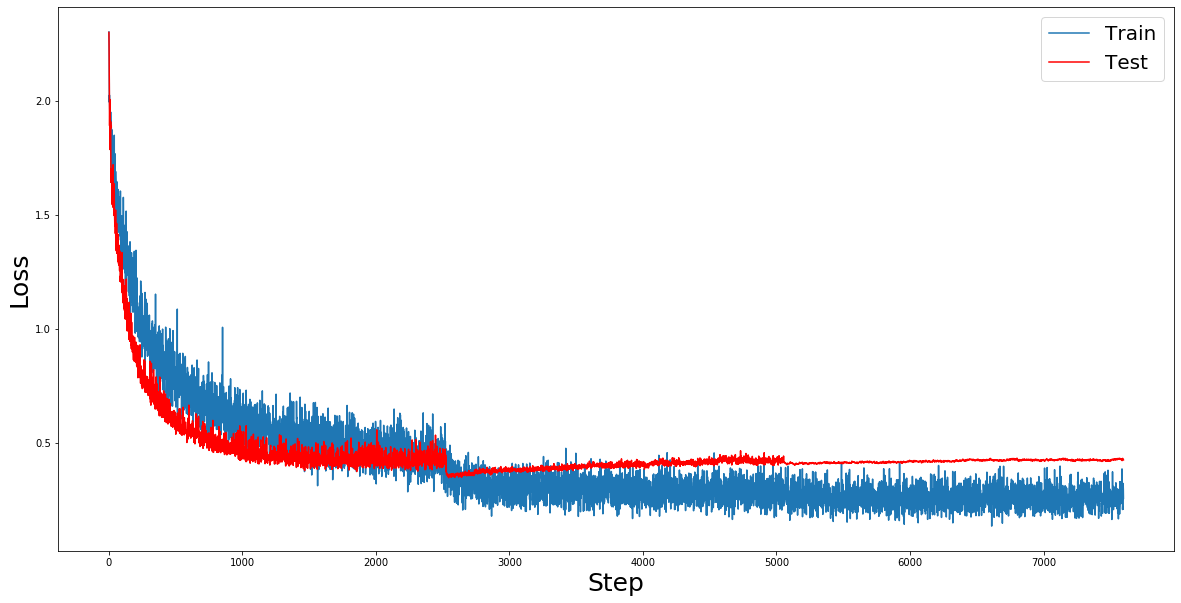

In [10]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(vgg.train_losses, label='Train')
test_lossline, = plt.plot(vgg.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

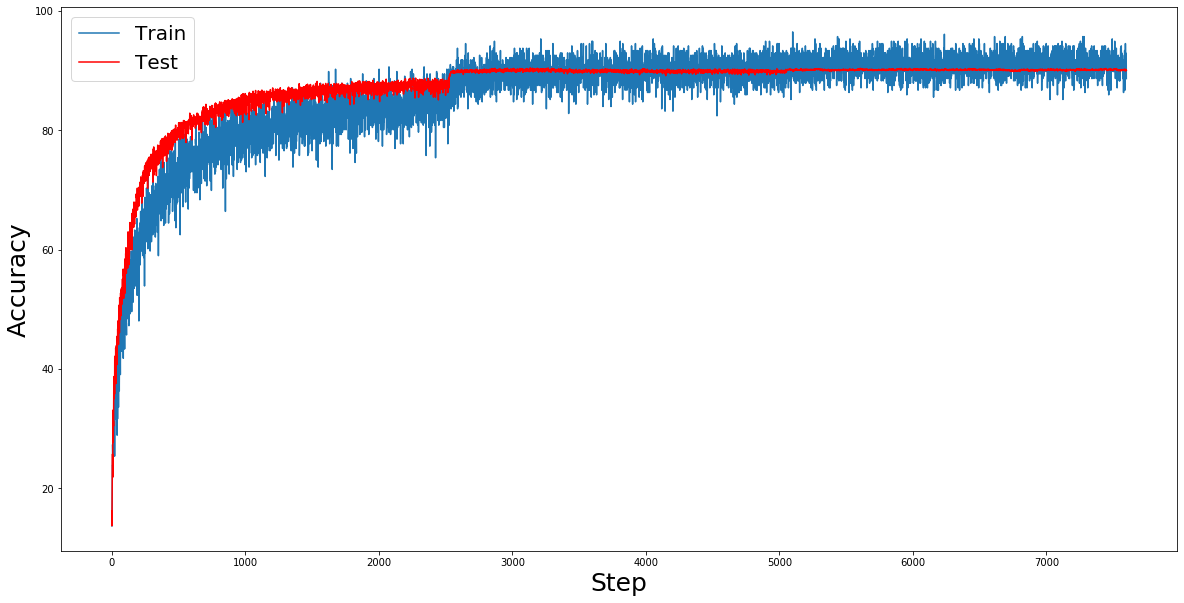

In [11]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(vgg.train_acc, label='Train')
test_accline, = plt.plot(vgg.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)
plt.show()